# Banking dataset from PolyAI

https://github.com/PolyAI-LDN/task-specific-datasets

In [3]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import numpy as np

In [6]:
banking = open('./PolyAI/task-specific-datasets-master/banking_data/categories.json')
json.load(banking)
# print(banking)

['card_arrival',
 'card_linking',
 'exchange_rate',
 'card_payment_wrong_exchange_rate',
 'extra_charge_on_statement',
 'pending_cash_withdrawal',
 'fiat_currency_support',
 'card_delivery_estimate',
 'automatic_top_up',
 'card_not_working',
 'exchange_via_app',
 'lost_or_stolen_card',
 'age_limit',
 'pin_blocked',
 'contactless_not_working',
 'top_up_by_bank_transfer_charge',
 'pending_top_up',
 'cancel_transfer',
 'top_up_limits',
 'wrong_amount_of_cash_received',
 'card_payment_fee_charged',
 'transfer_not_received_by_recipient',
 'supported_cards_and_currencies',
 'getting_virtual_card',
 'card_acceptance',
 'top_up_reverted',
 'balance_not_updated_after_cheque_or_cash_deposit',
 'card_payment_not_recognised',
 'edit_personal_details',
 'why_verify_identity',
 'unable_to_verify_identity',
 'get_physical_card',
 'visa_or_mastercard',
 'topping_up_by_card',
 'disposable_card_limits',
 'compromised_card',
 'atm_support',
 'direct_debit_payment_not_recognised',
 'passcode_forgotten',
 

In [44]:
bank_train = pd.read_csv('./PolyAI/task-specific-datasets-master/banking_data/train.csv')
bank_train = bank_train.dropna()
bank_train = bank_train.replace('\n','', regex=True)
bank_train[1280:1300]

,text,category
1280,How do I fix my card if it is broken?,card_not_working
1281,Why doesn't my card work for any transactions?,card_not_working
1282,"I tried using my card, but it doesn't work.",card_not_working
1283,My card hasn't been working for even small tra...,card_not_working
1284,What do I do if the machine rejects my card?,card_not_working
1285,Something's wrong my card won't work.,card_not_working
1286,I tried to use my card today in the restaurant...,card_not_working
1287,"Suddenly, my card won't work.",card_not_working
1288,My card hasn't been working when I try to use it.,card_not_working
1289,My physical card is not working,card_not_working


In [45]:
bank_train.category.value_counts()

card_payment_fee_charged                            187
direct_debit_payment_not_recognised                 182
balance_not_updated_after_cheque_or_cash_deposit    181
wrong_amount_of_cash_received                       180
cash_withdrawal_charge                              177
                                                   ... 
lost_or_stolen_card                                  82
card_swallowed                                       61
card_acceptance                                      59
virtual_card_not_working                             41
contactless_not_working                              35
Name: category, Length: 77, dtype: int64

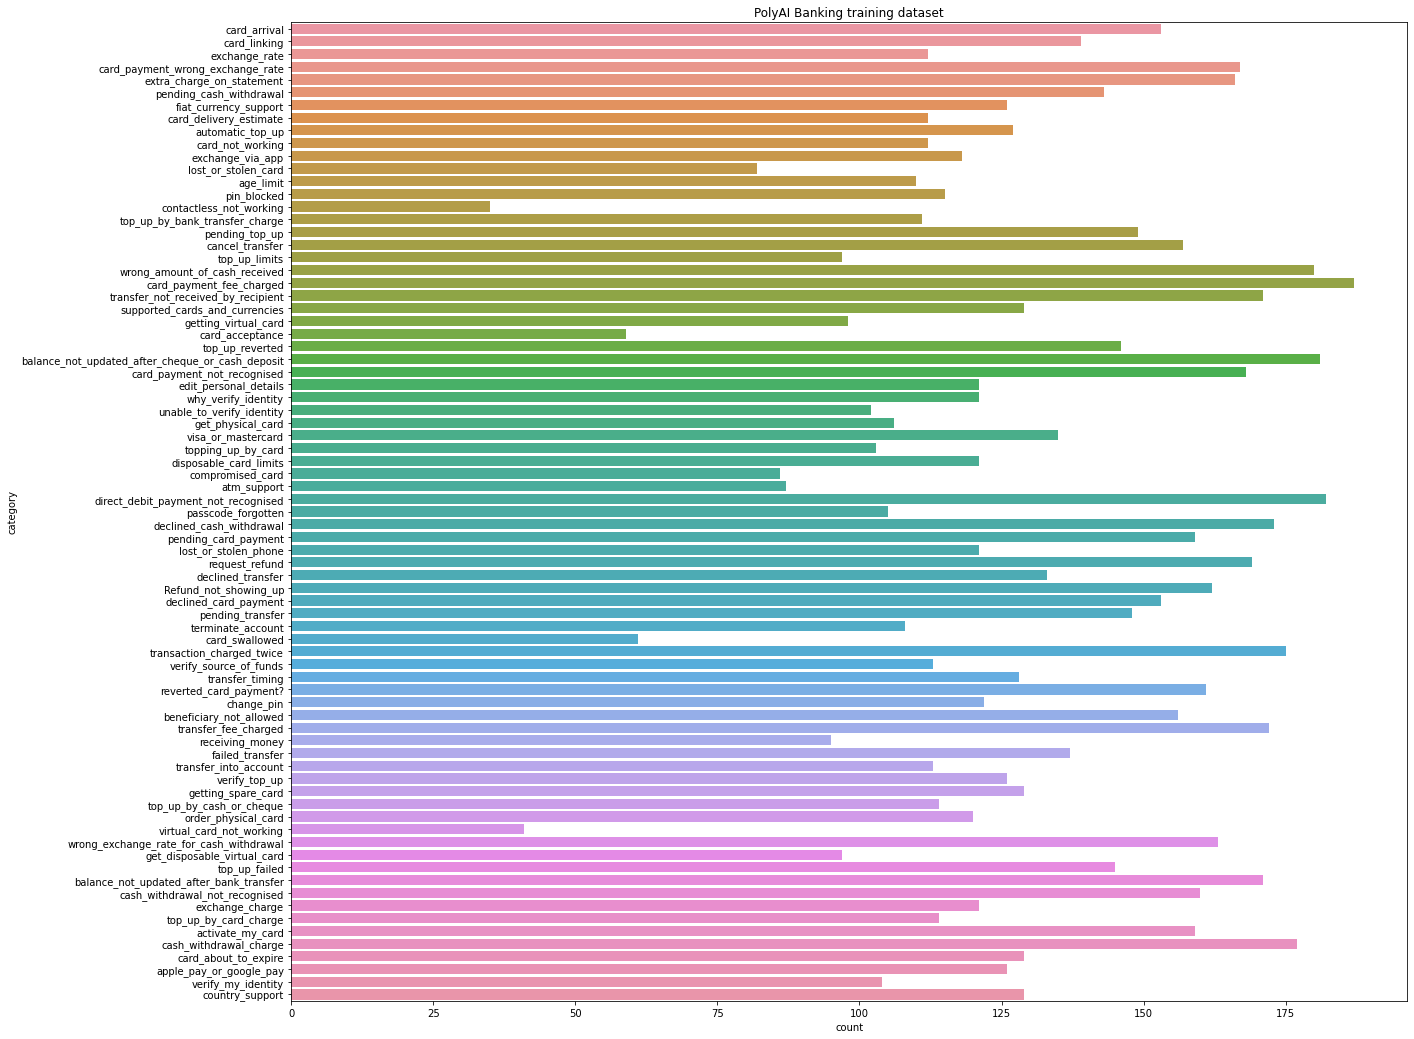

In [46]:
import seaborn as sns
plt.figure(figsize=(20,18))
sns.countplot(y = bank_train.category, data = bank_train, )
plt.title('PolyAI Banking training dataset')
plt.savefig('banking_train_category.png')
plt.show()

## A simple Python implementation of ngram sunburst (nested pie chart) visualization showed in CoQA paper

https://github.com/mrzjy/sunburst

In [20]:
!python Analysis.py -read=example.txt

2022-12-07 11:47:47,768 - INFO - constructing ngram Trie
2022-12-07 11:47:53,717 - INFO - postprocessing
2022-12-07 11:47:53,719 - INFO - 	pruning
2022-12-07 11:47:53,760 - INFO - 	colorizing


In [47]:
with open('bank_train.txt', 'w') as f:
    for line in bank_train.text.to_list():
        f.write(f"{line}\n")

In [72]:
with open('bank_train_first_word.txt', 'w') as f:
    for line in bank_train.text.to_list():
        f.write(f"{line.split(' ')[0]}\n")

In [64]:
!python Analysis.py -read=bank_train.txt

2022-12-07 14:14:22,722 - INFO - constructing ngram Trie
2022-12-07 14:14:25,477 - INFO - postprocessing
2022-12-07 14:14:25,477 - INFO - 	pruning
2022-12-07 14:14:25,492 - INFO - 	colorizing


In [75]:
!python Analysis.py -read=bank_train_first_word.txt

2022-12-07 14:20:59,756 - INFO - constructing ngram Trie
2022-12-07 14:20:59,762 - INFO - postprocessing
2022-12-07 14:20:59,762 - INFO - 	pruning
2022-12-07 14:20:59,762 - INFO - 	colorizing


In [78]:
a = []
for i in bank_train.text.to_list():
    a.append(i.split(' ')[0])
    # print(i[0])
# a.count('my')

In [112]:
from collections import Counter
first = Counter(a).most_common(20)
first

[('I', 2465),
 ('How', 966),
 ('Why', 817),
 ('What', 786),
 ('Can', 640),
 ('My', 594),
 ('Is', 372),
 ('The', 230),
 ('Where', 205),
 ('Do', 192),
 ('There', 161),
 ('When', 145),
 ("I'm", 128),
 ('Please', 121),
 ('Are', 114),
 ('Will', 101),
 ('how', 82),
 ('If', 81),
 ('i', 61),
 ('Hi,', 59)]

In [116]:
xx = [x[0] for x in first]
yy = [x[1] for x in first]

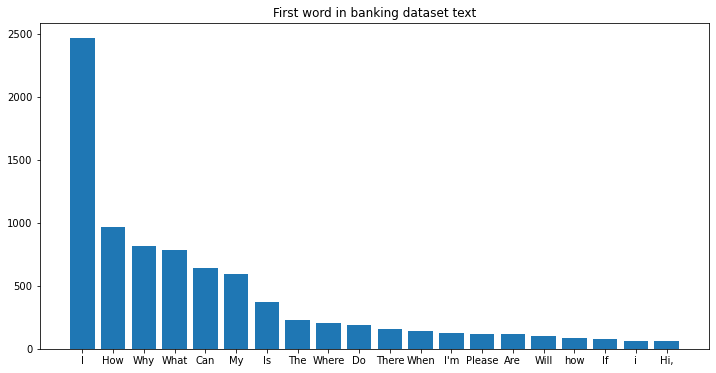

In [123]:
plt.figure(figsize=(12,6))
plt.bar(xx, yy)
plt.title('First word in banking dataset text')
plt.savefig('first_word_num.png')

# Style transfer

In [85]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("rajistics/informal_formal_style_transfer")

model = AutoModelForSeq2SeqLM.from_pretrained("rajistics/informal_formal_style_transfer",)

In [89]:
from transformers import pipeline

classifier = pipeline(task = 'text2text-generation', model = model, tokenizer=tokenizer,  style = 1)


In [90]:
source_sentences = [
"I would love to meet attractive men in town",
"Please leave the room now",
"It is a delicious icecream",
"I am not paying this kind of money for that nonsense",
"He is on cocaine and he cannot be trusted with this",
"He is a very nice man and has a charming personality",
"Let us go out for dinner",
"We went to Barcelona for the weekend. We have a lot of things to tell you.",
] 

In [91]:
classifier(source_sentences, truncation = True, )

ValueError: The following `model_kwargs` are not used by the model: ['style'] (note: typos in the generate arguments will also show up in this list)

In [92]:
!pip install git+https://github.com/PrithivirajDamodaran/Styleformer.git

  Cloning https://github.com/PrithivirajDamodaran/Styleformer.git to c:\users\xinguan\appdata\local\temp\pip-req-build-wa0o706t
  Resolved https://github.com/PrithivirajDamodaran/Styleformer.git to commit 09d1a58c0169d1201081d05e1b97d197951af48d
  Created wheel for styleformer: filename=styleformer-0.1-py3-none-any.whl size=8666 sha256=763392675b94baaa79a86c48bbe51cbc74a50ccb7cf049f86b686a155c9f36bd
  Stored in directory: C:\Users\xinguan\AppData\Local\Temp\pip-ephem-wheel-cache-5iy71li5\wheels\fe\f5\14\7978e21e6f72e65207457cddb09bd32bba117965d5ba6d0098
Successfully built styleformer


  Running command git clone -q https://github.com/PrithivirajDamodaran/Styleformer.git 'C:\Users\xinguan\AppData\Local\Temp\pip-req-build-wa0o706t'


In [93]:
!pip install styleformer

In [94]:
from styleformer import Styleformer
import warnings
warnings.filterwarnings("ignore")

# style = [0=Casual to Formal, 1=Formal to Casual, 2=Active to Passive, 3=Passive to Active etc..]
sf = Styleformer(style = 1) 
import torch
def set_seed(seed):
  torch.manual_seed(seed)
  if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

set_seed(1212)

source_sentences = [
"I would love to meet attractive men in town",
"Please leave the room now",
"It is a delicious icecream",
"I am not paying this kind of money for that nonsense",
"He is on cocaine and he cannot be trusted with this",
"He is a very nice man and has a charming personality",
"Let us go out for dinner",
"We went to Barcelona for the weekend. We have a lot of things to tell you.",
]   

for source_sentence in source_sentences:
    # inference_on = [-1=Regular model On CPU, 0-998= Regular model On GPU, 999=Quantized model On CPU]
    target_sentence = sf.transfer(source_sentence, inference_on=-1, quality_filter=0.95, max_candidates=5)
    print("[Formal] ", source_sentence)
    if target_sentence is not None:
        print("[Casual] ",target_sentence)
    else:
        print("No good quality transfers available !")
    print("-" *100)        

Downloading:   0%|          | 0.00/913 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.89k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

Formal to Casual model loaded...
[Formal]  I would love to meet attractive men in town
[Casual]  I'd love to meet sexy guys in town
----------------------------------------------------------------------------------------------------
[Formal]  Please leave the room now
[Casual]  Now... get out of the room
----------------------------------------------------------------------------------------------------
[Formal]  It is a delicious icecream
[Casual]  It is delicious icecream
----------------------------------------------------------------------------------------------------
[Formal]  I am not paying this kind of money for that nonsense
[Casual]  I'm not paying this kind of money for that nonsense
----------------------------------------------------------------------------------------------------
[Formal]  He is on cocaine and he cannot be trusted with this
[Casual]  he's on coke and can't be trusted with this.
-----------------------------------------------------------------------------

In [99]:
bank_train_1 = bank_train.text.to_list()

for source_sentence in bank_train_1[20:30]:
    # inference_on = [-1=Regular model On CPU, 0-998= Regular model On GPU, 999=Quantized model On CPU]
    target_sentence = sf.transfer(source_sentence, inference_on=-1, quality_filter=0.95, max_candidates=5)
    print("[Formal] ", source_sentence)
    if target_sentence is not None:
        print("[Casual] ",target_sentence)
    else:
        print("No good quality transfers available !")
    print("-" *100)        

[Formal]  On the card that is coming, what's the tracking info?
[Casual]  on the card that is coming, what is the tracking info?
----------------------------------------------------------------------------------------------------
[Formal]  What is the status of my card's delivery?
No good quality transfers available !
----------------------------------------------------------------------------------------------------
[Formal]  Have you sent out my card yet?
[Casual]  have you yet to send my card out?
----------------------------------------------------------------------------------------------------
[Formal]  My card isn't here yet.
[Casual]  my card is not here yet.
----------------------------------------------------------------------------------------------------
[Formal]  where is my new card?
[Casual]  Where's my new card?
----------------------------------------------------------------------------------------------------
[Formal]  It's been a week since you sent my card and I sti

In [97]:
bank_train_2 = ['Does the package with my card have tracking?']

for source_sentence in bank_train_2:
    # inference_on = [-1=Regular model On CPU, 0-998= Regular model On GPU, 999=Quantized model On CPU]
    target_sentence = sf.transfer(source_sentence, inference_on=-1, quality_filter=0.95, max_candidates=5)
    print("[Formal] ", source_sentence)
    if target_sentence is not None:
        print("[Casual] ",target_sentence)
    else:
        print("No good quality transfers available !")
    print("-" *100)  

[Formal]  Does the package with my card have tracking?
[Casual]  Does the package with my card have tracking?
----------------------------------------------------------------------------------------------------


In [125]:
# style = [0=Casual to Formal, 1=Formal to Casual, 2=Active to Passive, 3=Passive to Active etc..]
# sf = Styleformer(style = 0) 
# import torch
# def set_seed(seed):
#   torch.manual_seed(seed)
#   if torch.cuda.is_available():
#     torch.cuda.manual_seed_all(seed)

# set_seed(1212)

source_sentences = ["I'm learning a lot about NLP here, but I'm not learning fast enough to keep up with the project, especially as it's moving towards commercialisation. This has caused me some stress and a lot of physical discomfort. I plan to go home for a period of rest and recuperation during the Chinese New Year. I've also been thinking a lot about applying for a PhD during this time in company and I think I may not have as strong a love for academia as I expected. I have also talked to current and graduated PhDs in my company and the pace of research is not to my liking. Thank you, teacher, for giving me the opportunity to try and make mistakes. This learning experience in the company was invaluable.In the last remaining month, I will assist Yanlin with the production of synthetic training data and trying to use Expected Value of Perfect Information theory and reverse engineering to build the framework of chatbot evaluation."]  

for source_sentence in source_sentences:
    # inference_on = [-1=Regular model On CPU, 0-998= Regular model On GPU, 999=Quantized model On CPU]
    target_sentence = sf.transfer(source_sentence, inference_on=-1, quality_filter=0.95, max_candidates=5)
    print("[Formal] ", source_sentence)
    if target_sentence is not None:
        print("[Casual] ",target_sentence)
    else:
        print("No good quality transfers available !")
    print("-" *100)        
# letter = ["I'm learning a lot about nlp here, but I'm not learning fast enough to keep up with the project, especially as it's moving towards commercialisation"]

[Formal]  I'm learning a lot about NLP here, but I'm not learning fast enough to keep up with the project, especially as it's moving towards commercialisation. This has caused me some stress and a lot of physical discomfort. I plan to go home for a period of rest and recuperation during the Chinese New Year. I've also been thinking a lot about applying for a PhD during this time in company and I think I may not have as strong a love for academia as I expected. I have also talked to current and graduated PhDs in my company and the pace of research is not to my liking. Thank you, teacher, for giving me the opportunity to try and make mistakes. This learning experience in the company was invaluable.In the last remaining month, I will assist Yanlin with the production of synthetic training data and trying to use Expected Value of Perfect Information theory and reverse engineering to build the framework of chatbot evaluation.
[Casual]  I am learning about NLP here, but I'm not learning fast

# Google people also asked

In [133]:
'''
cnn
'''
from bs4 import BeautifulSoup as BS
import requests as req
  
url = "https://www.google.com/search?q=hengseng+bank+I+am+still+waiting+on+my+card%3F&rlz=1C1BNSD_enHK1014HK1014&sxsrf=ALiCzsb65F8MlAWk-Wu3Dfk6de9uygTm7A%3A1670829221679&ei=pdSWY4GFKcum-QbnkKLgBg&ved=0ahUKEwjB6_Pxw_P7AhVLU94KHWeICGwQ4dUDCA8&uact=5&oq=hengseng+bank+I+am+still+waiting+on+my+card%3F&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIHCCEQoAEQCjIHCCEQoAEQCjIHCCEQoAEQCjIHCCEQoAEQCjIHCCEQoAEQCjoKCAAQRxDWBBCwA0oECEEYAEoECEYYAFDdEFjdEGDsH2gCcAF4AIABbogBbpIBAzAuMZgBAKABAqABAcgBCsABAQ&sclient=gws-wiz-serp"
  
webpage = req.get(url)  # YOU CAN EVEN DIRECTLY PASTE THE URL IN THIS
# HERE HTML PARSER IS ACTUALLY THE WHOLE HTML PAGE
trav = BS(webpage.content, "html.parser")
  
# TO GET THE TPYE OF CLASS
# HERE 'a' STANDS FOR ANCHOR TAG IN WHICH NEWS IS STORED
for link in trav.find_all(['span', 'div']):
    # print(type(link.string), " ", link.string)
    print(link.name + ' ' + link.text.strip())

for link in trav.find_all("div", attrs={'class': 'Wt5Tfe', }):
    # print(type(link.string), " ", link.string)
    print(link.name + ' ' + link.text.strip())

for link in trav.find_all("span", attrs={'class': 'CSkcDe'}):
    # print(type(link.string), " ", link.string)
    print(link.name + ' ' + link.text.strip())

for link in trav.find_all("div", attrs={'class': 'kfsfbe adDDi'}):
    # print(type(link.string), " ", link.string)
    print(link.name + ' ' + link.text.strip())

div Google
span G
span o
span o
span g
span l
span e
div ×
div ×
div ×
div ×
div 
div 若您在數秒內仍未能自動跳轉，請點擊這裏。
div 全部圖片地圖新聞 影片 購物 書籍 搜尋工具    不限語言不限語言搜尋所有中文網頁搜尋繁體中文網頁不限時間不限時間 過去 1 小時 過去 24 小時 過去 1 週 過去 1 個月 過去 1 年所有結果所有結果一字不差目前顯示的是以下字詞的搜尋結果： hang seng bank I am still waiting on my card?您可以改回搜尋： hengseng bank I am still waiting on my card?Hang Seng Credit Card Customer Service Hotlineswww.hangseng.com › en-hk › personal › cards › hotlineFor credit card enquiries, please contact our customer service representative at 24-hour Credit Card Customer Service Hotline 2998 8222.缺少字詞：  am waitingFaster Payment System (FPS) - Hang Seng Bankwww.hangseng.com › en-hk › personal › banking › fpsFPS lets you pay bills, transfer between local banks for free by simply using your phone number, email address or FPS ID. You can also register with your ...[PDF] Hang Seng alpha card Spending Card Benefits Directorywww.hangseng.com › dam › hase › config › personal › cards › pdfsOnline enquiry on alpha card transact

In [141]:
import urllib
import requests
from bs4 import BeautifulSoup  # 第三方包，处理html对象
import re


def search_google(query):
    # 爬取网页html源码
    url = 'https://google.com/search?q=' + urllib.parse.quote(query)
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers)

    # 使用BeautifulSoup解析html对象，并使用正则表达式查找目标内容
    results = []
    soup = BeautifulSoup(response.text, 'html.parser')
    for item in soup.find_all("span", attrs={'class': 'CSkcDe'}):
        results.append(item.text)
        # string = str(item.string)
        # res = re.findall(r'(?P<name>.+?) - (?P<work>.+?) - (?P<company>SES Satellites) \| LinkedIn', string, flags=re.I | re.S)
        # if len(res) > 0:
        #     results.extend(res)
    return results


if __name__ == '__main__':
    results = search_google(query='hengseng bank I am still waiting on my card?')
    print(results)


[]


# Discuss.com.hk

https://www.discuss.com.hk/

https://forum.hkgolden.com/

scrape url list in discuss.com.hk

In [176]:
from bs4 import BeautifulSoup
import requests
import re


# function to extract html document from given url
def getHTMLdocument(url):
	
	# request for HTML document of given url
	response = requests.get(url)
	
	# response will be provided in JSON format
	return response.text

	
# assign required credentials
# assign URL
# link list
'''
# query = 中国银行 + 信用卡
'''
def get_url_list(query, page_num):
	href_list = []
	# for i in range(1,2):
	url_to_scrape = "https://www.discuss.com.hk/search.php?orderby=most_relevant&searchsubmit=yes&srcheng=1&srchtxt=" + '{}'.format(query) +'&page={}'.format(page_num)

	# create document
	html_document = getHTMLdocument(url_to_scrape)

	# create soap object
	soup = BeautifulSoup(html_document, 'html.parser')


	# find all the anchor tags with "href"
	# attribute starting with "https://"
	for link in soup.find_all('a', attrs={'href': re.compile("^https://www.discuss.com.hk" and "feedback")}):
		# display the actual urls
			href_list.append(link.get('href'))
			# print(link.get('href'))

	href_list = list(set(href_list))
	
	return href_list

In [161]:
href_list = []
url_to_scrape = get_url_list('中国银行')

# create document
html_document = getHTMLdocument(url_to_scrape)

# create soap object
soup = BeautifulSoup(html_document, 'html.parser')


# find all the anchor tags with "href"
# attribute starting with "https://"
for link in soup.find_all('a', attrs={'href': re.compile("^https://www.discuss.com.hk" and "feedback")}):
    # display the actual urls
        href_list.append(link.get('href'))
        # print(link.get('href'))

href_list = list(set(href_list))

18

scrape post in url

In [173]:
def get_post(url_list):
    post = []
    for url in url_list:    
        post_dict = {}
        webpage = req.get(url)  # YOU CAN EVEN DIRECTLY PASTE THE URL IN THIS
        # HERE HTML PARSER IS ACTUALLY THE WHOLE HTML PAGE
        trav = BS(webpage.content, "html.parser")

  
        # TO GET THE TPYE OF CLASS
        # HERE 'a' STANDS FOR ANCHOR TAG IN WHICH NEWS IS STORED
        count = 0
        for link in trav.find_all('span', attrs={'id': re.compile('^postorig')}):
            # print(type(link.string), " ", link.string)
            count+=1
            post_dict[count] = link.text.strip()
            # print(link.text.strip())
        post.append(post_dict)
    return post

turn to dataframe

|query|title|section|author|feedback|time|

In [183]:
import time
def post_df(query,max_page):
    df_all = pd.DataFrame(None)
    url_list, post = [],[]
    for i in range(1,max_page):
        url_list = get_url_list(query, i)
        post = get_post(url_list)
        time.sleep(0.001)
        df_1 = pd.DataFrame({'url': url_list, 'post':post})
        df_all = pd.concat([df_all, df_1])
    return df_all


In [184]:
hk_chinabank = post_df('中国银行', 50)
hk_chinabank

,url,post
0,https://www.discuss.com.hk/viewthread.php?tid=...,"{1: '中國銀行幾時派息', 2: 'seem is 20/7', 3: 'THX', 4..."
1,https://www.discuss.com.hk/viewthread.php?tid=...,"{1: '3988 中國銀行 入得未?', 2: '你夠膽就得', 3: '等$1.8先買都..."
2,https://www.discuss.com.hk/viewthread.php?tid=...,{1: 'BACHY -7.206% 中國銀行3988在美國的預託證券大跌7.2%， ...
3,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '中國銀行(中國) 和中國銀行(香港) 係咪互通? 若中國銀行(中國) AC 有問...
4,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '點解中銀香港 2388 十幾倍 pe， 4%息， 但係中國銀行 3988 3倍p...
...,...,...
13,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '摩通增持中國銀行（０３９８８）６１９９萬股，每股４﹒２５元 《經濟通通訊社...
14,https://www.discuss.com.hk/viewthread.php?tid=...,"{1: '點解每晚約8點就唔存唔到港幣現金！！幾個區都係咁！！！', 2: '引用:原帖由 ..."
15,https://www.discuss.com.hk/redirect.php?goto=f...,"{1: '騰訊585元可買。', 2: '已在585.5元買入騰訊 16055978..."
16,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '中國經濟網北京1月12日訊(王紅娟)國泰君安證券公司(Guotai Junan S...


In [186]:
hk_hengsengbank = post_df('恒生银行', 50)
hk_hengsengbank

,url,post
0,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '恒生銀行買得過？ 前景如何？ 幾錢先入好？'}
1,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '今天中午12時左右芝麻來電顯示恒生銀行致電，於是接聽。對方是男人，話有一筆優惠貸款...
2,https://www.discuss.com.hk/viewthread.php?tid=...,"{1: '恆生銀行可唔可以過數去南洋商業銀行?', 2: 'Need to fill in ..."
3,https://www.discuss.com.hk/redirect.php?goto=f...,{1: '引用:原帖由 胡三刀 於 2022-12-13 14:03 發表 今晚美國CPI...
4,https://www.discuss.com.hk/viewthread.php?tid=...,"{1: '恆生銀行仲入唔入得過 ?', 2: 'all in', 3: '引用:原帖由 la..."
...,...,...
14,https://www.discuss.com.hk/redirect.php?goto=f...,{1: 'https://goo.gl/maps/6AycVxWNoM52 上去揸goo...
15,https://www.discuss.com.hk/redirect.php?goto=f...,{1: '引用:原帖由 家中少白襪 於 2022-6-18 18:47 發表 你講d，...
16,https://www.discuss.com.hk/redirect.php?goto=f...,{1: '引用:原帖由 Kira|Yamato 於 2017-3-29 09:00 PM 發...
17,https://www.discuss.com.hk/redirect.php?goto=f...,{1: '引用:原帖由 美國狗犯民亂港 於 2017-6-6 06:01 PM 發表 ...


In [230]:
hk_hengsengbank.to_csv('hk_hengsengbank.csv')

In [187]:
hk_zhadabank = post_df('渣打', 50)
hk_zhadabank

,url,post
0,https://www.discuss.com.hk/viewthread.php?tid=...,"{1: '本人在$180買了渣打，請問現在點好？ 等？還是忍痛割？', 2: '180蚊太貴..."
1,https://www.discuss.com.hk/viewthread.php?tid=...,"{1: '想問渣打依家渣得過嗎 見咁平想買手', 2: '分注買無問題'}"
2,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '用渣打買股票，如果渣打執左，怎辦? 打好準備，呢啲時勢，乜柒都會發生....'...
3,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '渣打乜事急升？'}
4,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '淨收息渣打一年都派幾十萬俾我，無得輸。一兩年會升至$200渣打PB value 0...
...,...,...
13,https://www.discuss.com.hk/viewthread.php?tid=...,"{1: '英脫歐風險巨，匯豐、渣打恐錄巨額英鎊損失', 2: 'Good news', 3:..."
14,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '渣打去年多賺17%至32.98億美元 【16:34】2009年03月03日 ...
15,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '消息指渣打集團(02888)本周開始在香港等地裁員。外電引述消息人士指，渣打擬削減...
16,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '渣打倫敦股價升4% 較本港收市價高逾3% 2013-03-05 16:54:40...


In [206]:
discuss_query = ['交通銀行','中信银行','建设银行', '集友银行', '創興銀行', '花旗銀行', '大新銀行', '星展銀行', '富邦銀行', '永隆銀行', '大有銀行', '大生銀行', ]
for qu in discuss_query:
    qu_df = post_df(qu, 50)
    qu_df.to_csv('{}.csv'.format(qu))

In [189]:
hk_dongyabank = post_df('东亚银行', 50)
hk_dongyabank

,url,post
0,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '#23 東亞銀行 good news is coming .. 爆上 wai...
1,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '我想問各位有無試過用東亞信用卡買完野之後，打上去東亞銀行做分期（唔系借錢），系咪真...
2,https://www.discuss.com.hk/viewthread.php?tid=...,"{1: '23東亞銀行 摩根士丹利: 評級 減持 , 目標價 $22', 2: '23東..."
3,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '23 東亞銀行 東亞銀行去年全年業績，純利６５﹒０９億元，按年下跌３０﹒３６...
4,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '請問東亞銀行幾時公佈中期業績'}
...,...,...
13,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '明報專訊】本港樓價持續上升，情況令人關注。東亞銀行(新聞 - 網站 - 圖片)（0...
14,https://www.discuss.com.hk/redirect.php?goto=f...,"{1: '睇到報紙廣告話，可係珠海買新樓盤，香港銀行做按揭，請問有冇人操作過？', 2: '..."
15,https://www.discuss.com.hk/viewthread.php?tid=...,"{1: '尋日去排隊果d...真係on9', 2: 'any financial insti..."
16,https://www.discuss.com.hk/redirect.php?goto=f...,"{1: '港行,有無C hing 見到邊度有現貨 或唔使點排既店鋪呀', 2: '上星期在..."


In [6]:
hs = pd.read_csv('./恒生银行.csv')
hs

,Unnamed: 0,url,post
0,0,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '恒生銀行買得過？\r\n前景如何？\r\n幾錢先入好？'}
1,1,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '今天中午12時左右芝麻來電顯示恒生銀行致電，於是接聽。對方是男人，話有一筆優惠貸款...
2,2,https://www.discuss.com.hk/viewthread.php?tid=...,"{1: '恆生銀行可唔可以過數去南洋商業銀行?', 2: 'Need to fill in ..."
3,3,https://www.discuss.com.hk/redirect.php?goto=f...,{1: '引用:原帖由 胡三刀 於 2022-12-13 14:03 發表 \n今晚美國CP...
4,4,https://www.discuss.com.hk/viewthread.php?tid=...,"{1: '恆生銀行仲入唔入得過 ?', 2: 'all in', 3: '引用:原帖由 la..."
...,...,...,...
811,14,https://www.discuss.com.hk/redirect.php?goto=f...,{1: 'https://goo.gl/maps/6AycVxWNoM52\n\r\n上去揸...
812,15,https://www.discuss.com.hk/redirect.php?goto=f...,{1: '引用:原帖由 家中少白襪 於 2022-6-18 18:47 發表 \n\r\n你...
813,16,https://www.discuss.com.hk/redirect.php?goto=f...,{1: '引用:原帖由 Kira|Yamato 於 2017-3-29 09:00 PM 發...
814,17,https://www.discuss.com.hk/redirect.php?goto=f...,{1: '引用:原帖由 美國狗犯民亂港 於 2017-6-6 06:01 PM 發表 \n\...


In [22]:
hs.post[815]

"{1: '但點解我投訴恆生銀行冇利是封一事，佢地當我透明？！', 2: '好火！', 3: '我地公司都無..\\n\\r\\n今年只係得boc..', 4: '因為無利是封同佢地的銷售手法無關！', 5: '大家都係優越理財，點解有d人有，有d人冇，一係索性大家都冇！', 6: '引用:原帖由 cftria13 於 2009-1-19 09:04 PM 發表 \\r\\n因為無利是封同佢地的銷售手法無關！  service........poor relationship with customer', 7: '引用:原帖由 ckh3111 於 2009-1-19 09:05 PM 發表 \\r\\n中銀香港死咁精...一早都貼通告話派晒... 恆生冇話派晒，係唔俾人'}"

In [ ]:
hss = hs.copy()

In [42]:
a,b = 0,0
print(a)

0


In [44]:

'''
Count question categories
'''
def count_q(df):
    q_who = ['邊個', '谁', '哪个']
    q_what = ['乜嘢', '做乜']
    q_when = ['几时', '幾時', '什么时候']
    q_where = ['哪','邊度']
    q_why = ['點解']
    q_how = ['點样']
    q_doyouknow = ['識唔識', '知不知', '知不知道']
    q_isit = ['是否','是不是','系唔系']
    q_all = [q_who, q_what, q_when, q_where, q_why, q_how, q_doyouknow, q_isit]

    count_who, count_what, count_when, count_where, count_why, count_how, count_doyouknow, count_isit = 0, 0,0,0,0,0,0,0
    count_all = [count_who, count_what, count_when, count_where, count_why, count_how, count_doyouknow, count_isit]

    cat_num = len(q_all)
    for i in range(len(df)):
        for q_cat in range(cat_num):
            for q in range(len(q_all[q_cat])):
                for qq in q:
                    count_all[q_cat] += hs.post[i].count(qq)

            
    return q_all

In [45]:
test =  count_q(hs)

TypeError: object of type 'int' has no len()

In [ ]:
class clean(df):
        '''
        \\r\\n
        '''
    def clean_rn(df):
        clean_target = ['\\r', '\\n','\r', '\n', '\xa0']


In [4]:
dy = pd.read_csv('./东亚银行.csv')
dy

,Unnamed: 0,url,post
0,0,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '#23 東亞銀行 good news is coming ..\xa0\xa0爆上...
1,1,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '我想問各位有無試過用東亞信用卡買完野之後，打上去東亞銀行做分期（唔系借錢），系咪真...
2,2,https://www.discuss.com.hk/viewthread.php?tid=...,"{1: '23東亞銀行\n\r\n摩根士丹利:\xa0評級\xa0減持 ,\xa0目標價 $..."
3,3,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '23 東亞銀行\n\n\r\n東亞銀行去年全年業績，純利６５﹒０９億元，按年下跌３...
4,4,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '請問東亞銀行幾時公佈中期業績'}
...,...,...,...
847,13,https://www.discuss.com.hk/viewthread.php?tid=...,{1: '明報專訊】本港樓價持續上升，情況令人關注。東亞銀行(新聞 - 網站 - 圖片)（0...
848,14,https://www.discuss.com.hk/redirect.php?goto=f...,"{1: '睇到報紙廣告話，可係珠海買新樓盤，香港銀行做按揭，請問有冇人操作過？', 2: '..."
849,15,https://www.discuss.com.hk/viewthread.php?tid=...,"{1: '尋日去排隊果d...真係on9', 2: 'any financial insti..."
850,16,https://www.discuss.com.hk/redirect.php?goto=f...,"{1: '港行,有無C hing 見到邊度有現貨\r\n或唔使點排既店鋪呀', 2: '上星..."


In [34]:
dy.post[1]

"{1: '我想問各位有無試過用東亞信用卡買完野之後，打上去東亞銀行做分期（唔系借錢），系咪真系要等7個工作天先回覆你得唔得？', 2: '引用:原帖由 liz_hermione 於 2015-8-21 11:09 AM 發表 \\r\\n我想問各位有無試過用東亞信用卡買完野之後，打上去東亞銀行做分期（唔系借錢），系咪真系要等7個工作天先回覆你得唔得？ 直接問銀行啦 !', 3: '問左啦，距話會視乎你既信貸評級去決定做唔做到分期，我只系想問一下有無人有類似經驗'}"

In [29]:
ll = dy.post[8].split(',')
tt = ['引用']
if any(sub in ll for sub in tt):
    print(1)
else:
    print(2)

2


In [30]:
ll

["{1: '請問一下東亞銀行有IPO margin 申請嗎？我的渣打銀行沒有人IPO 服務的，我要換銀行了'",
 " 2: '東亞係咪要打電話申請㗎？ 同埋抽孖展有風險，小心'",
 " 3: '渣打冇ipo孖展'",
 " 4: 'Hang seng 唔錯'",
 " 5: '引用:原帖由 288328832883 於 2017-11-18 01:49 PM 發表 \\r\\n渣打冇ipo孖展 冇 ar'}"]

In [31]:
# hk_dongyabank = hk_dongyabank.reset_index()
dy.post[9]

"{1: '有冇人知在東亞銀行做it 有冇伏？好吾好', 2: '銀行版話東亞就裁員，而家佢地搵緊consultant制定精簡方案，你google下', 3: '但it 仲請人甘怪🤨', 4: '引用:原帖由 12445 於 2020-1-23 08:27 PM 發表 \\n但it 仲請人甘怪🤨 舊人跳船囉', 5: '東亞it伏到爆啦, n年前仲要求用自雇形式 引用:原帖由 12445 於 2020-1-23 07:40 PM 發表 \\r\\n有冇人知在東亞銀行做it 有冇伏？好吾好', 6: '有幾怪? 成日有人走咪要成日請 引用:原帖由 12445 於 2020-1-23 08:27 PM 發表 \\r\\n但it 仲請人甘怪🤨', 7: '引用:原帖由 java2 於 2020-1-23 11:14 PM 發表 \\r\\n東亞it伏到爆啦, n年前仲要求用自雇形式 \\n\\n對渣華版友又認識多咗。\\xa0 \\n\\n\\r\\n對東亞有什麼看法?', 8: '東亞it 好亂，鐘意執屎可以去，危中有機', 9: '其實有邊間好做?', 10: '東亞it好似要番工打咭', 11: '伏到一個點，未過probation 已經要走！大嘅鬧人就識，事事濶佬懶理。細嘅個個十幾廿年年資，死都做靚唔肯升上去。門第觀念極重，有request 嚟，唔係friend, 咪射波dum下拖下，起槓嘈下交或者叫自己老細施壓推甩咗佢算囉！每星期開會廢噏三四個鐘，講埋哂d細微細眼嘢，大嘅嘢講到決定到咩？SM 1 or Division head 話乜就乜啦，全部扮工扮經過討論啫！想騎下牛搵隻馬，咪入去做幾個月算囉！', 12: '引用:原帖由 chiuwan826 於 2020-5-18 01:32 AM 發表 \\n伏到一個點，未過probation 已經要走！大嘅鬧人就識，事事濶佬懶理。細嘅個個十幾廿年年資，死都做靚唔肯升上去。門第觀念極重，有request 嚟，唔係friend, 咪射波dum下拖下，起槓嘈下交或者叫自己老細施壓推甩咗佢算囉！每星期開會廢噏三四個鐘，講埋哂d細微細眼嘢，大嘅嘢講到決定到咩？SM 1 or Division head 話乜就乜啦，全部扮工扮經過討論啫！想騎下牛搵隻馬，咪入去做 ... 升職問題，好多公司都存在。你已經是員工，就算你幾掂，升你亦

In [32]:
dy.post[10]

"{1: '想一問東亞銀行幾時收到利息......', 2: '引用:原帖由 townray 於 2010-4-6 10:11 PM 發表 \\r\\n想一問東亞銀行幾時收到利息...... 公布日期股票\\r\\n編號股票簡稱財政年度事項除淨或生效日期截止過戶日期派息日2010/02/1100023東亞銀行2009/12末期息４８仙，可以股代息2010/03/26[table]2010/03/30至2010/03/31[/td][td=1,1,70]2010/04/23[/td][/tr][/table]'}"

In [33]:
dy.post[11]

"{1: '請問，東亞銀行 risk department 工作地點，在香港哪區？', 2: 'Kwun tong', 3: '創紀之城五期'}"

In [190]:
hk_dongyabank.to_csv('hk_dongyabank.csv')

In [155]:
for link in trav.find_all('div', attrs={'class': re.compile('^postmessage')}):
    # print(type(link.string), " ", link.string)
    print(link.text.strip())

引用:原帖由 路仁月 於 2022-2-18 01:06 PM 發表 

就係... 好似唔少人都呻過... 又要上去排隊... 放街好過  唔係貪佢個 trade 額外 $400 .
同埋 Fold 3 銀色得官網有。
都未必係 官網買。
不過今次 1TB 開得高，所以放棄。
其他顏色又唔啱。
所以買番 512 紅 , 跟番 N20U .
引用:原帖由 路仁月 於 2022-2-18 01:06 PM 發表 

就係... 好似唔少人都呻過... 又要上去排隊... 放街好過  唔係貪佢個 trade 額外 $400 .
同埋 Fold 3 銀色得官網有。
都未必係 官網買。
不過今次 1TB 開得高，所以放棄。
其他顏色又唔啱。
所以買番 512 紅 , 跟番 N20U .
mobile_1.jpg (89.89 KB)2022-2-18 13:37中移送既野
mobile_1.jpg (89.89 KB)2022-2-18 13:37中移送既野
官網訂渣打卡有一成回贈又唔錯
官網訂渣打卡有一成回贈又唔錯
引用:原帖由 生果轉貼員 於 2022-2-18 01:40 PM 發表 
官網訂渣打卡有一成回贈又唔錯 官網好遲送貨
引用:原帖由 生果轉貼員 於 2022-2-18 01:40 PM 發表 
官網訂渣打卡有一成回贈又唔錯 官網好遲送貨
[按此打開]
[隱藏]











九衝左去蘇X出左 S22 256gb，$6298。恆 X 冬日特專 + 蘇X特惠，回贈 $290 cash dollar。除三星贈品外，蘇 X 送 18W 充電器、尿袋等。2/3攞機，知道未必最抵，但終於買左，訓得著。😂😂

[ 本帖最後由 maskedtsang 於 2022-2-18 03:45 PM 編輯 ]
九衝左去蘇X出左 S22 256gb，$6298。恆 X 冬日特專 + 蘇X特惠，回贈 $290 cash dollar。除三星贈品外，蘇 X 送 18W 充電器、尿袋等。2/3攞機，知道未必最抵，但終於買左，訓得著。😂😂

[ 本帖最後由 maskedtsang 於 2022-2-18 03:45 PM 編輯 ]
引用:原帖由 Mannerdm 於 2022-2-18 01:14 PM 發表 

https://youtu.be/T9fGrqG7VLM S22 ul

# Question words in Cantonese

邊個、 谁、 哪个
識唔識、 知不知（道）
是否、是不是、系唔系